# Exploratory Data Analysis (EDA)


In [88]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from models.preparation import compute_correlation , point_biserial_correlation
from scipy.stats import pointbiserialr
from statsmodels.formula.api import ols
import statsmodels.api as sm
import missingno as msno 

# Set the theme for seaborn and matplotlib
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-whitegrid')


C:\Users\amine\AppData\Local\Temp\ipykernel_19364\502735170.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Aperçu Initial des Données

In [89]:
raw_data = pd.read_csv(r'models\data\data.csv', delimiter=';')

In [90]:
raw_data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8425,40,services,married,unknown,no,yes,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4838,33,admin.,married,high.school,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
19528,34,technician,divorced,university.degree,no,yes,yes,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,yes
34036,33,admin.,single,university.degree,no,yes,no,cellular,may,wed,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
16682,49,admin.,married,high.school,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
39321,27,admin.,single,unknown,no,yes,no,cellular,mar,mon,...,3,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
13443,35,technician,single,university.degree,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16048,27,blue-collar,married,basic.4y,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
1994,47,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9573,56,technician,divorced,professional.course,unknown,yes,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [91]:
raw_data.isna().sum().sum() # Nombre de valeurs manquantes

0

In [92]:
raw_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [94]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [95]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Cleaning

les donnee sont deja propre et il n'y a pas de valeurs manquantes

In [96]:
data = raw_data.copy()
data = data.drop(columns='duration') # Suppression de la colonne duration qui n'est pas connue avant le début de la campagne
data['pdays'] = data['pdays'].replace(999, -1) # Pour faciliter l'interprétation

In [97]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Nous observons de nombreuses valeurs `unknown` qui seront traitées comme des `NaN`s. De plus, les variables sont catégorielles, nous allons donc changer leur type en conséquence.


### Handling Missing Values

In [98]:
(data=="unknown").sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<Axes: >

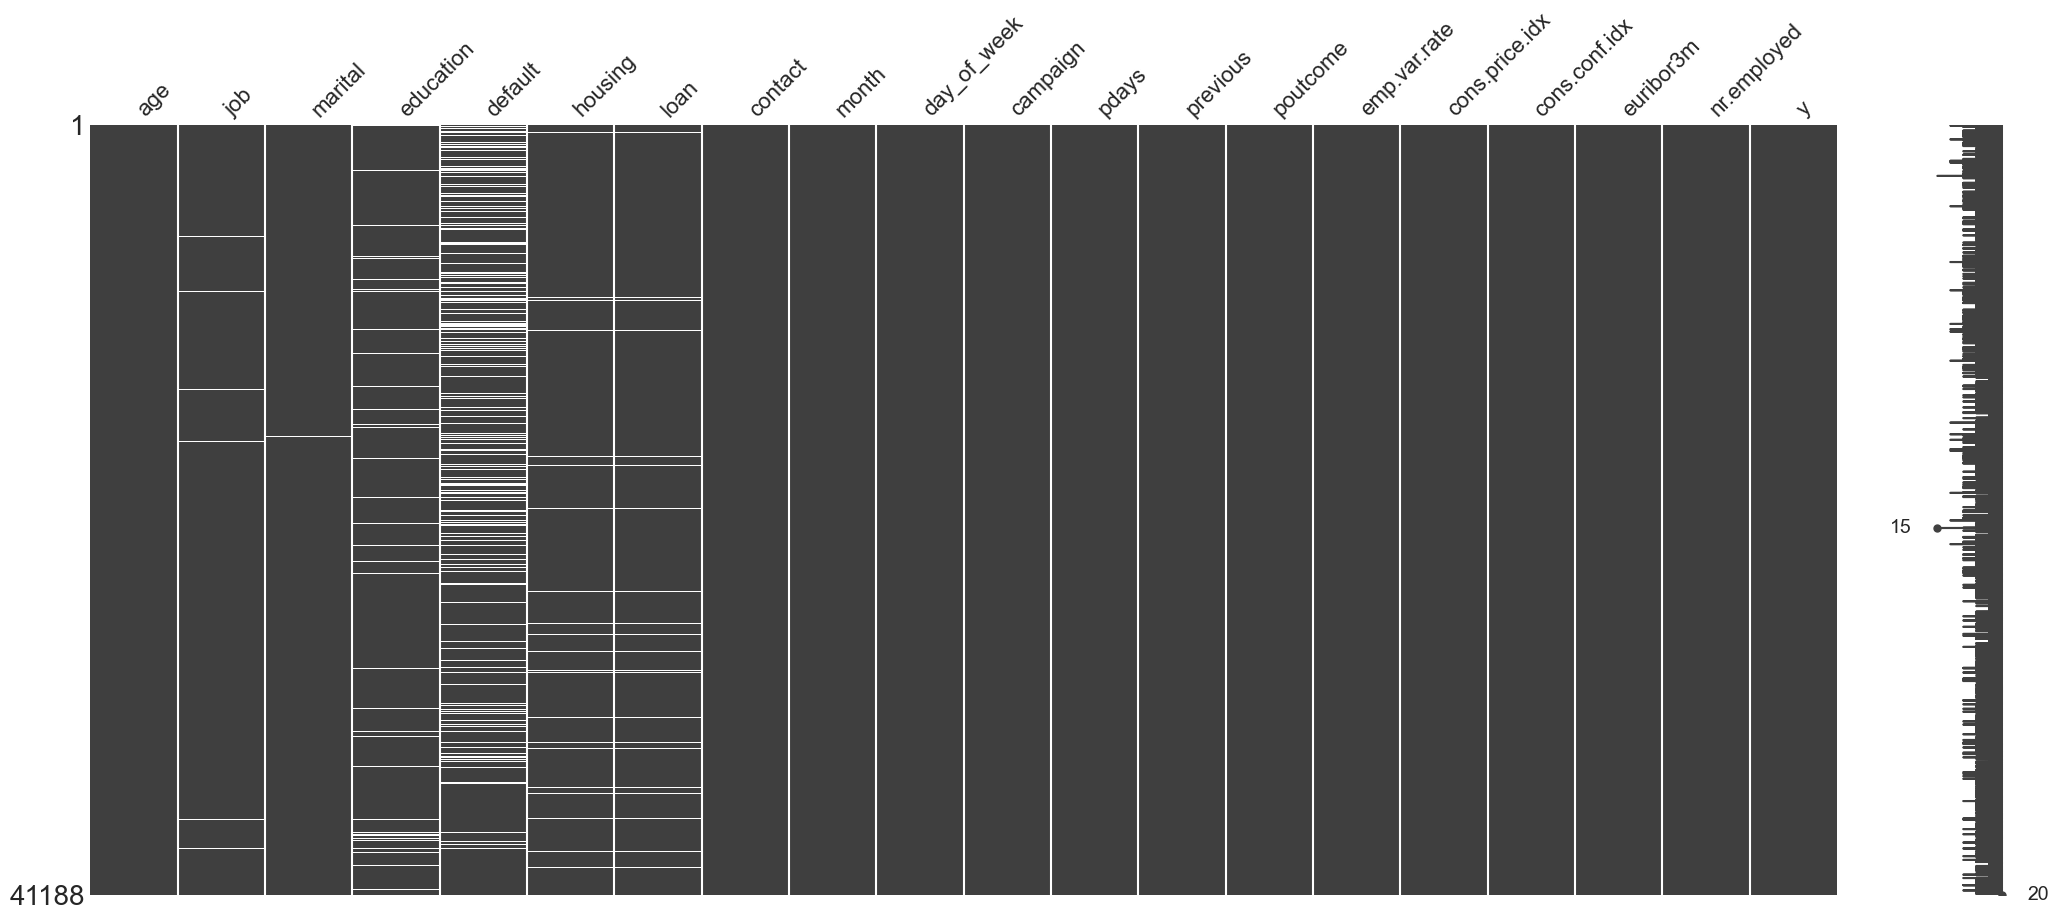

In [99]:
data.replace('unknown', np.nan, inplace=True)
msno.matrix(data) 

In [100]:
for column in data.select_dtypes(include='object').columns:
            data[column] = data[column].astype('category')
            
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: >

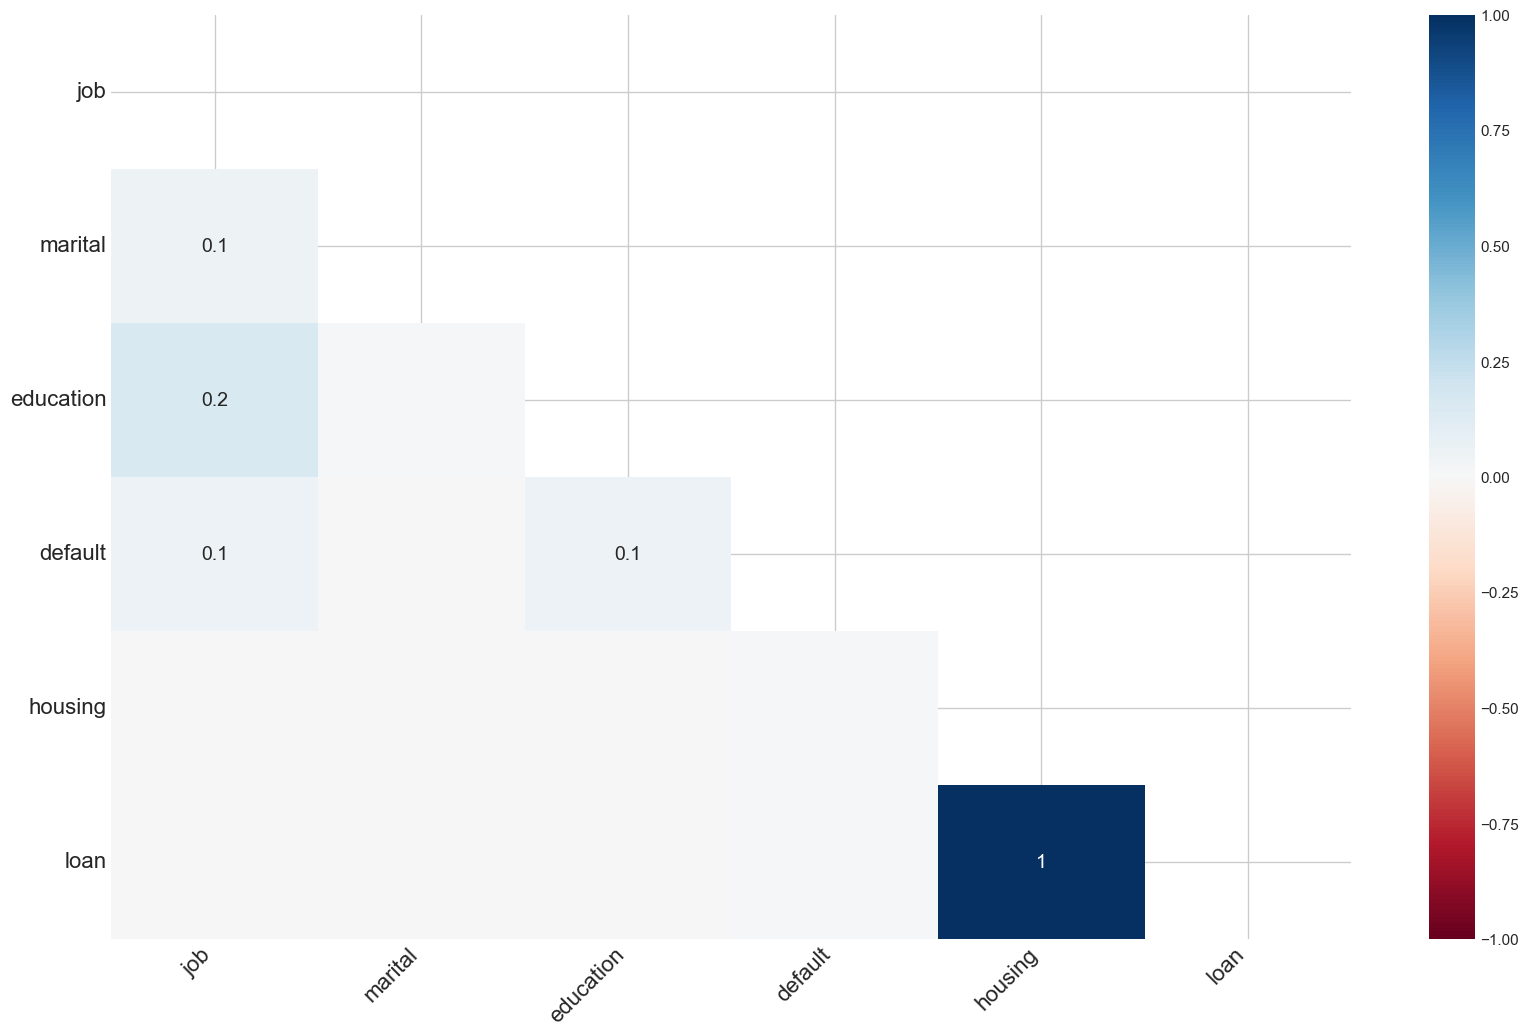

In [101]:
msno.heatmap(data)

In [102]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [104]:
numeric_columns = data.select_dtypes(exclude=['object','category']).columns
non_numeric_columns = data.select_dtypes(include=['object',"category"]).columns
for column in non_numeric_columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print("\n")

Unique values in column 'job':
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', NaN, 'entrepreneur', 'student']
Length: 12
Categories (11, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'services', 'student', 'technician', 'unemployed']


Unique values in column 'marital':
['married', 'single', 'divorced', NaN]
Categories (3, object): ['divorced', 'married', 'single']


Unique values in column 'education':
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', NaN, 'university.degree', 'illiterate']
Categories (7, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree']


Unique values in column 'default':
['no', NaN, 'yes']
Categories (2, object): ['no', 'yes']


Unique values in column 'housing':
['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']


Unique values in column 'loan':
['no', 'yes', NaN]
Categories (2, object): ['

Nous observons de nombreuses valeurs `unknown` qui seront traitées comme des `NaN`s. De plus, les variables sont catégorielles, nous allons donc changer leur type en conséquence.


In [105]:
discret_cols = data.select_dtypes(include='int64').columns
continuous_cols = data.select_dtypes(include='float64').columns
categorical_cols = data.select_dtypes(include='category').columns
numerical_cols = data.select_dtypes(include='number').columns

## Univariate Analysis


### Numerical Variables

In [106]:
numerical_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

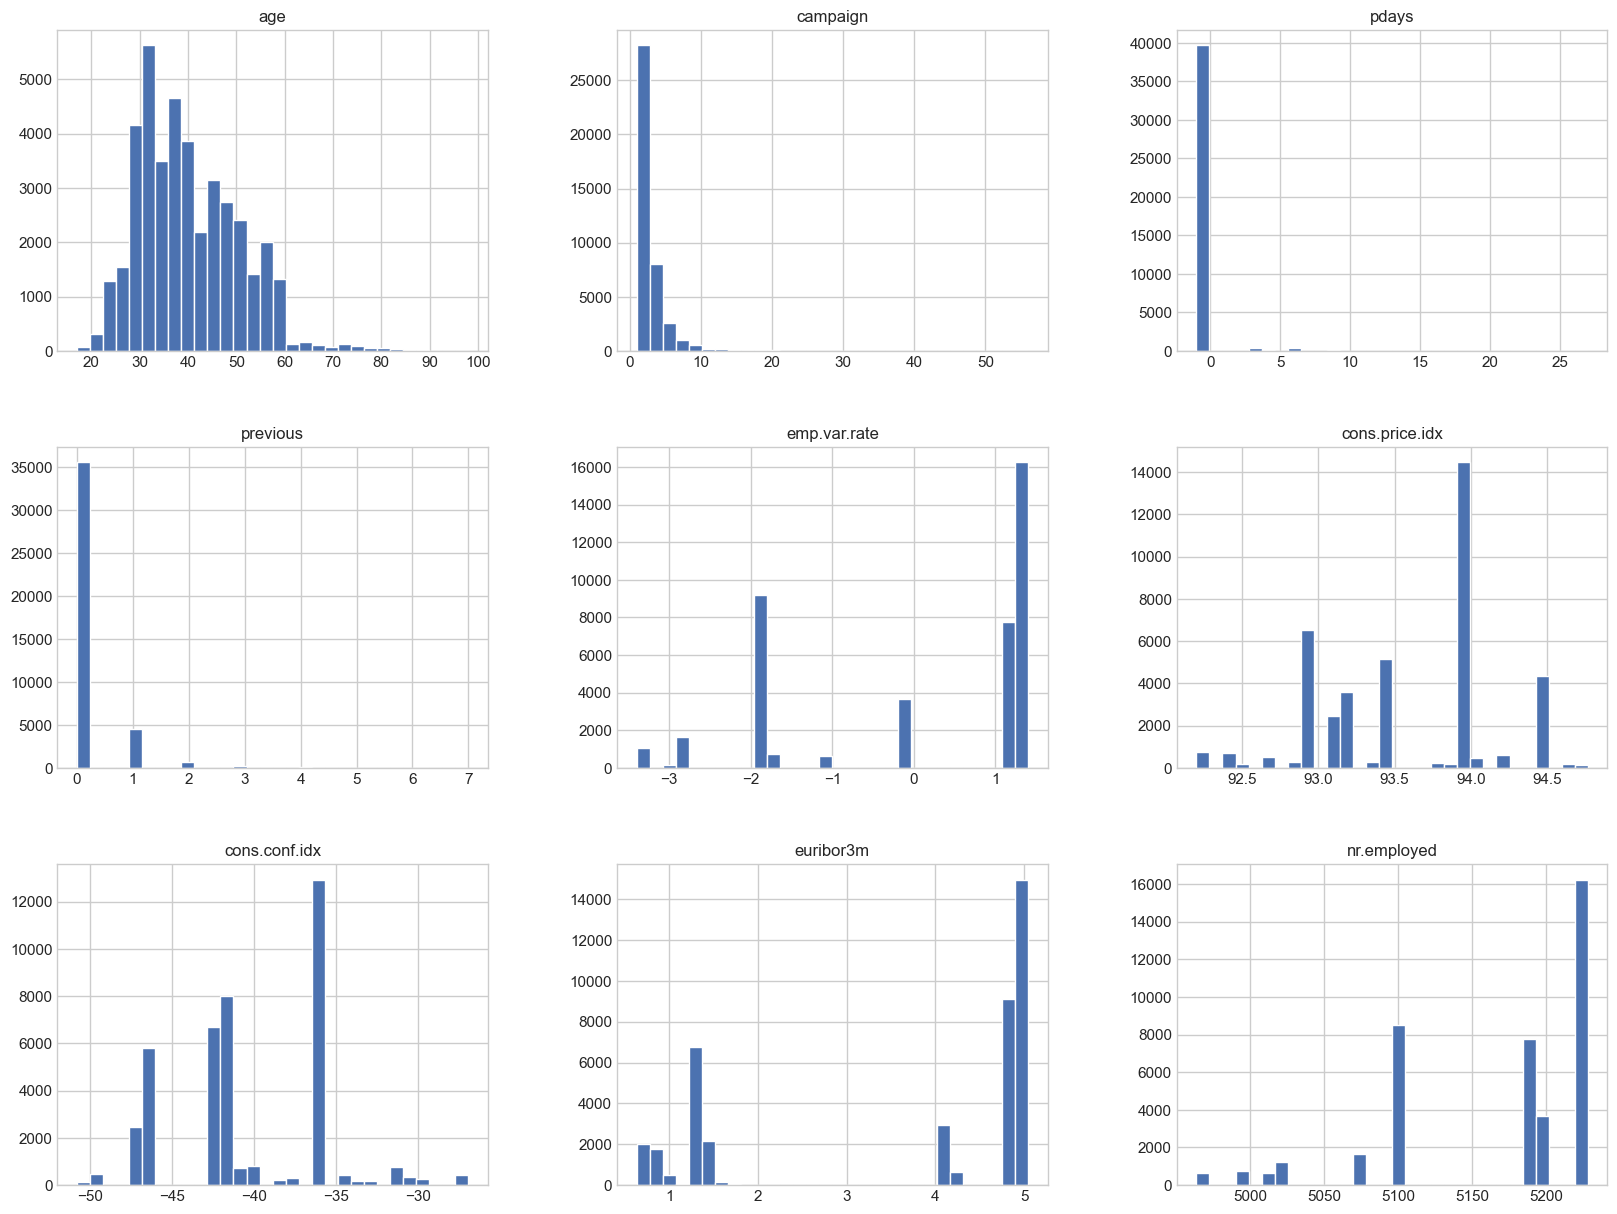

In [107]:
data[numerical_cols].hist(bins=30, figsize=(20, 15))
plt.show()


1. **Age**: The age distribution is positively skewed, with the majority of clients being between 20 and 60 years old, peaking around 30–40.

2. **Campaign**: Most clients were contacted only once during the current campaign. The count decreases sharply as the number of contacts increases.

3. **Pdays**: The majority of clients have not been contacted in previous campaigns (`-1` indicates no prior contact). A very small portion shows recent recontacts.

4. **Previous**: Most clients have not been contacted previously (`0`), and only a few have been contacted more than once in earlier campaigns.

#### Observations:
- Features like **campaign**, **pdays**, and **previous** suggest that the bank frequently targets new clients and rarely follows up with prior contacts.
- Highly skewed variables (e.g., **pdays**, **campaign**) may require transformation for modeling purposes to reduce bias in machine learning models.

### Categorical Data


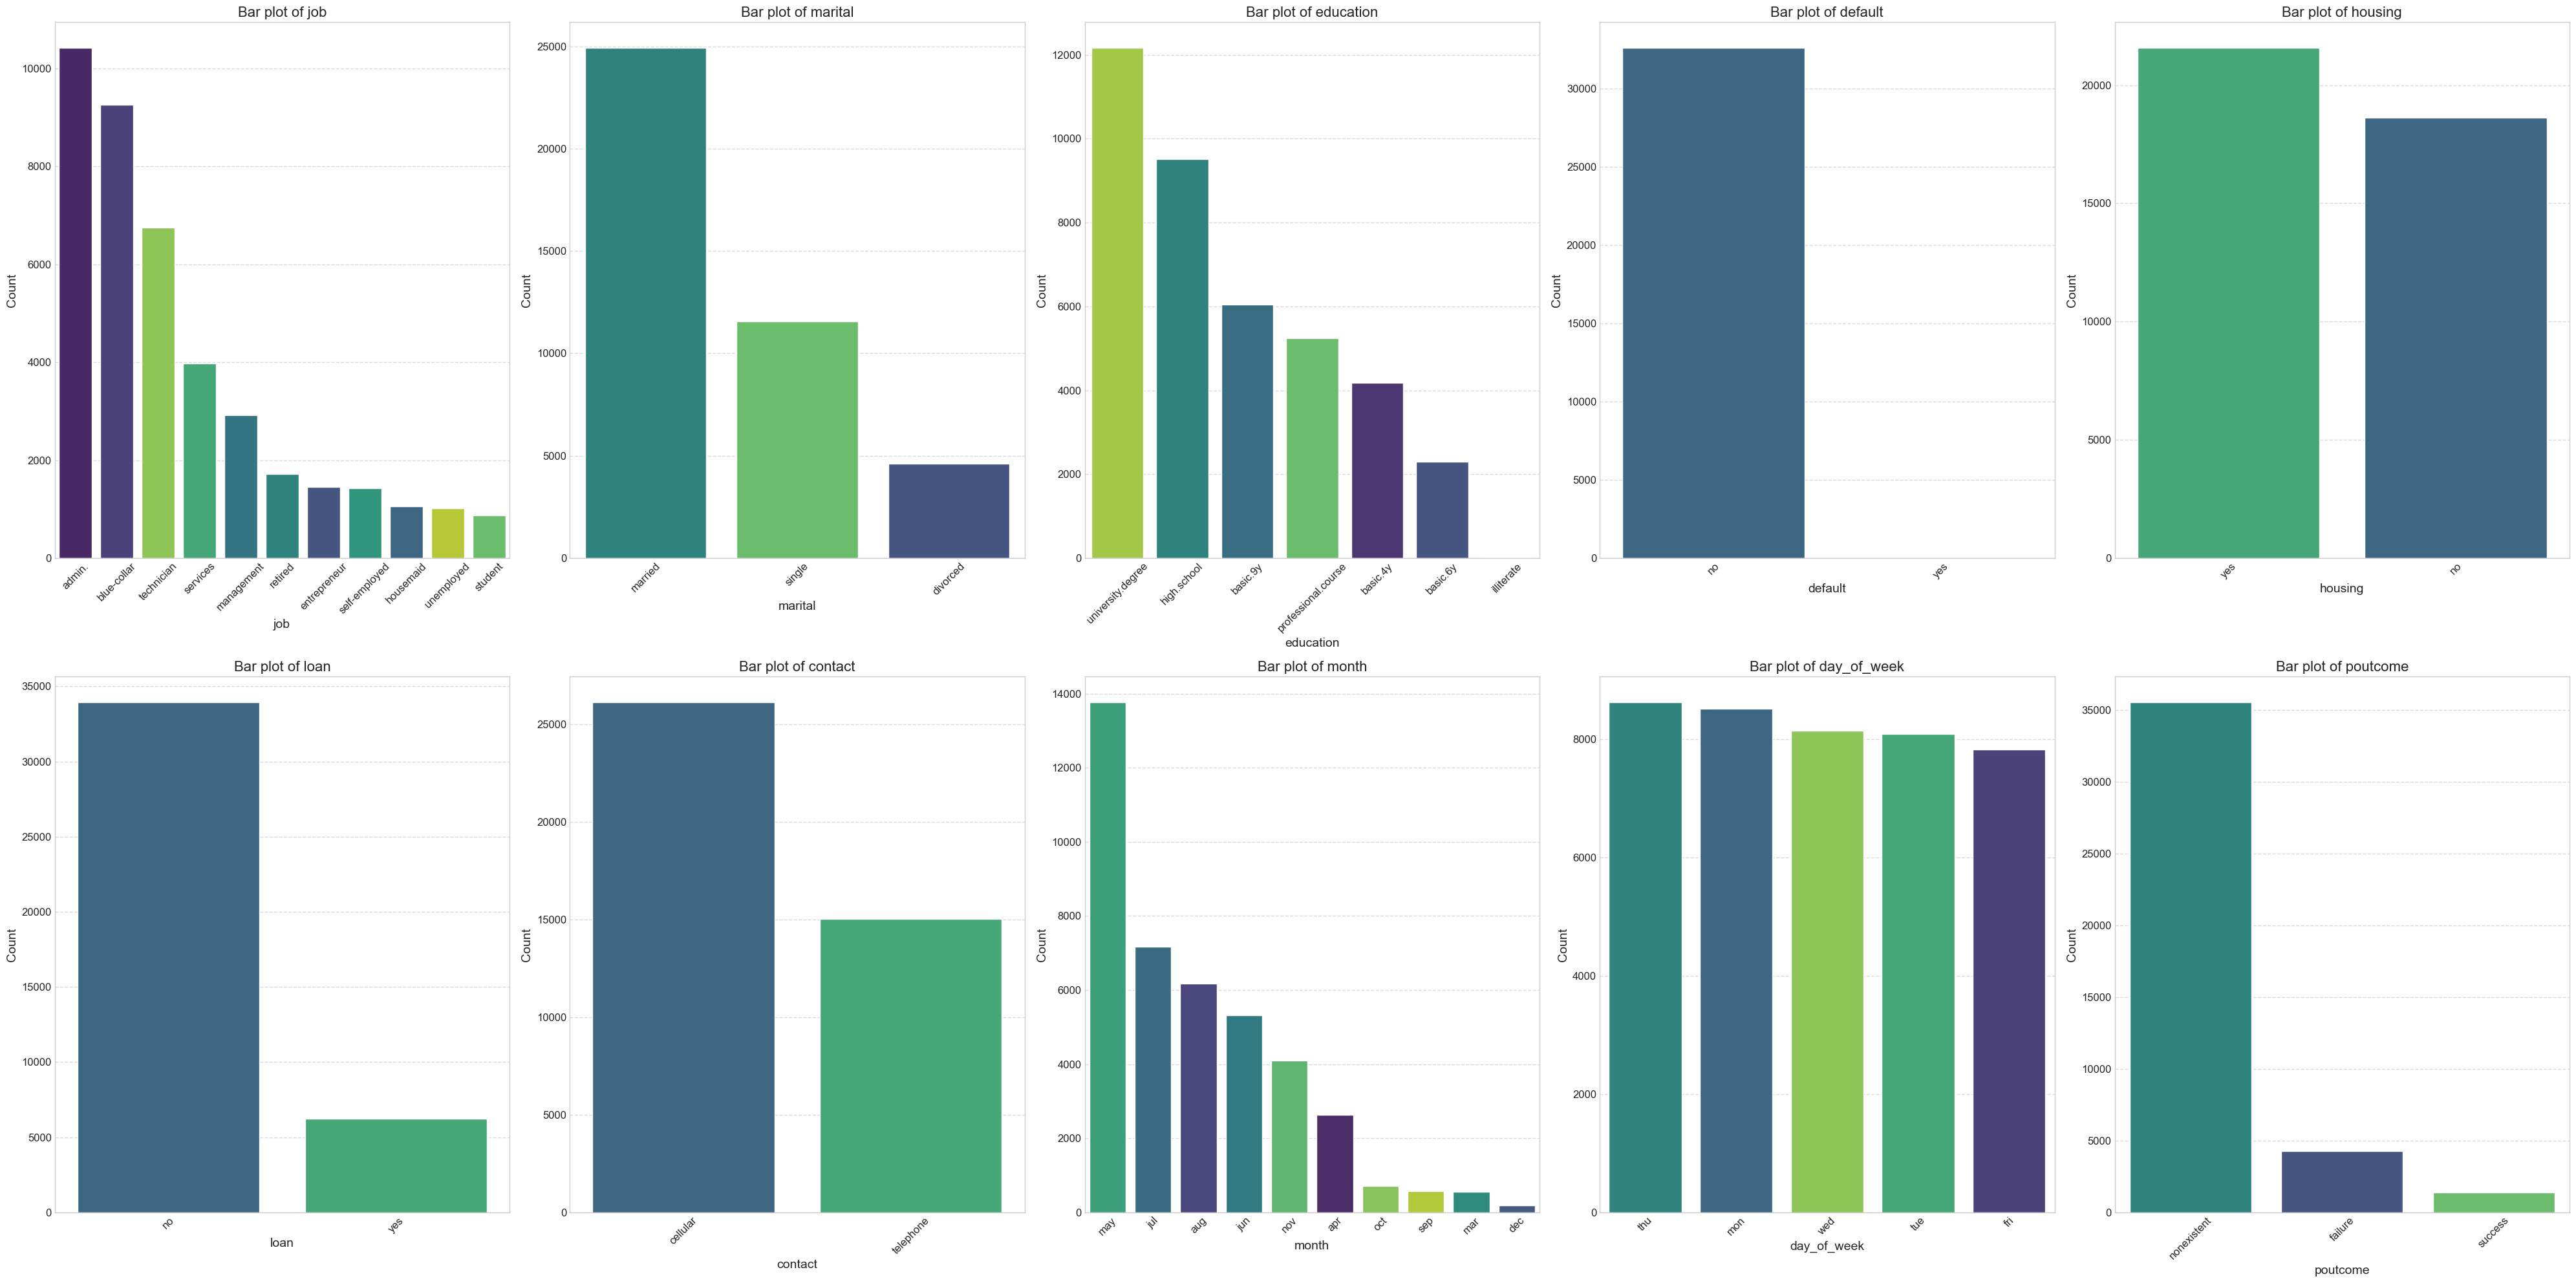

In [144]:
ncols = 5 
nrows = (len(categorical_cols) // ncols)  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 20))
axes = axes.flatten()
plot_idx = 0

for col in categorical_cols:
    if col == 'y':
        continue
    
    sns.countplot(x=data[col], hue=data[col], order=data[col].value_counts().index, palette='viridis', legend=False, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Bar plot of {col}', fontsize=16)
    axes[plot_idx].set_xlabel(col, fontsize=14)
    axes[plot_idx].set_ylabel('Count', fontsize=14)
    axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=12)
    axes[plot_idx].tick_params(axis='y', labelsize=12)
    axes[plot_idx].grid(axis='y', linestyle='--', alpha=0.7)
    plot_idx += 1

plt.tight_layout()
plt.show()


- **Job, Marital, and Education**: Most clients are employed in administrative or blue-collar jobs, with a significant portion in technician roles. A large majority are married, followed by single individuals. Educationally, university graduates dominate, though high school and basic education categories are also prominent. These factors could reflect the bank's primary target demographic for marketing campaigns.

- **Default, Housing, and Loan**: Very few clients have defaulted on loans, but housing loans are common. Personal loans are less frequent. These trends suggest the financial stability of the majority of the client base, which could influence the likelihood of subscribing to new financial products.

- **Contact and Month**: Cellular is the dominant mode of contact, highlighting the move toward more direct and personalized outreach. Campaign activity peaks in May, followed by progressively declining volumes in later months. This suggests a strategic push during a specific period, possibly tied to budget cycles or seasonal factors.

- **Day of the Week**: Calls are evenly distributed across weekdays, indicating no specific preference for a particular day to initiate contact.

- **Poutcome and Y (Target Variable)**: Most clients are marked as "nonexistent" for previous campaign outcomes, suggesting new outreach. Among those contacted, the success rate for subscription ("yes" in `y`) is relatively low compared to those who did not subscribe ("no"). This highlights the challenge of improving conversion rates.

## Bivariate Analysis


### With Target Variable

In [109]:
data[numerical_cols].corrwith(data['y'].cat.codes).sort_values(ascending=False)

pdays             0.279025
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
nr.employed      -0.354678
dtype: float64

The table above shows the correlation of numerical variables with the predictor 'y'. We can observe that some variables have a stronger correlation with the target variable 'y' than others. For instance, 'pdays' and 'previous' have a positive correlation with 'y', while 'nr.employed' and 'euribor3m' have a significative negative correlation.

### Numerical vs Numerical

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,campaign,pdays,previous
emp.var.rate,1.00,0.78,0.20,0.97,0.91,0.00,0.15,0.23,0.42
cons.price.idx,0.78,1.00,0.06,0.69,0.52,0.00,0.13,0.05,0.20
cons.conf.idx,0.20,0.06,1.00,0.28,0.10,0.13,0.01,0.07,0.05
euribor3m,0.97,0.69,0.28,1.00,0.95,0.01,0.14,0.26,0.45
nr.employed,0.91,0.52,0.10,0.95,1.00,0.02,0.14,0.34,0.50
age,0.00,0.00,0.13,0.01,0.02,1.00,0.00,0.02,0.02
campaign,0.15,0.13,0.01,0.14,0.14,0.00,1.00,0.04,0.08
pdays,0.23,0.05,0.07,0.26,0.34,0.02,0.04,1.00,0.51
previous,0.42,0.20,0.05,0.45,0.50,0.02,0.08,0.51,1.00


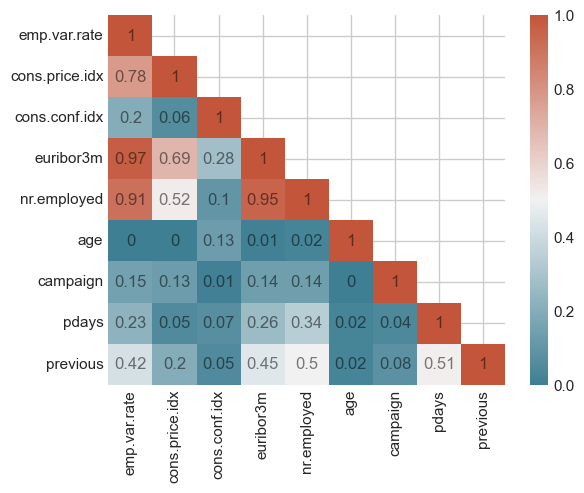

In [110]:
compute_correlation(data)

- Strong correlations exist between `emp.var.rate`, `euribor3m`, and `nr.employed`.  
- Moderate correlations are observed between `previous` and economic indicators (`nr.employed`, `euribor3m`, `emp.var.rate`), linking past campaign success to economic conditions.  
- Weak correlations for `age` and `campaign` indicate minimal influence on other variables.  

To reduce redundancy, the following highly correlated features can be dropped:  
- **`emp.var.rate`** (correlated with `euribor3m` at 0.97): Retain `euribor3m` for its stronger relevance.  
- **`nr.employed`** (correlated with `euribor3m` at 0.95): `euribor3m` captures similar information more effectively.  

Or we can use regularization techniques to handle multicollinearity in the model. 

In [111]:
# data.drop(columns=['emp.var.rate', 'nr.employed'], inplace=True)

### Numerical vs Categorical


In [112]:
point_biserial_corr = {
    (cat_col, num_col): pointbiserialr(
        data[cat_col].cat.codes if data[cat_col].dtype.name == 'category' else data[cat_col],
        data[num_col]
    )[0]
    for cat_col in categorical_cols for num_col in numerical_cols
}

point_biserial_corr_df = pd.DataFrame(
    list(point_biserial_corr.items()), 
    columns=['Variable Pair', 'Point-Biserial Correlation'])

point_biserial_corr_df=point_biserial_corr_df.sort_values(by='Point-Biserial Correlation', ascending=False,key=abs)

In [113]:
point_biserial_corr_df.head(30)

,Variable Pair,Point-Biserial Correlation
59,"(contact, cons.price.idx)",0.591474
61,"(contact, euribor3m)",0.399773
58,"(contact, emp.var.rate)",0.393584
9,"(marital, age)",-0.388687
83,"(poutcome, pdays)",0.363514
98,"(y, nr.employed)",-0.354678
84,"(poutcome, previous)",-0.313110
97,"(y, euribor3m)",-0.307771
94,"(y, emp.var.rate)",-0.298334
92,"(y, pdays)",0.279025


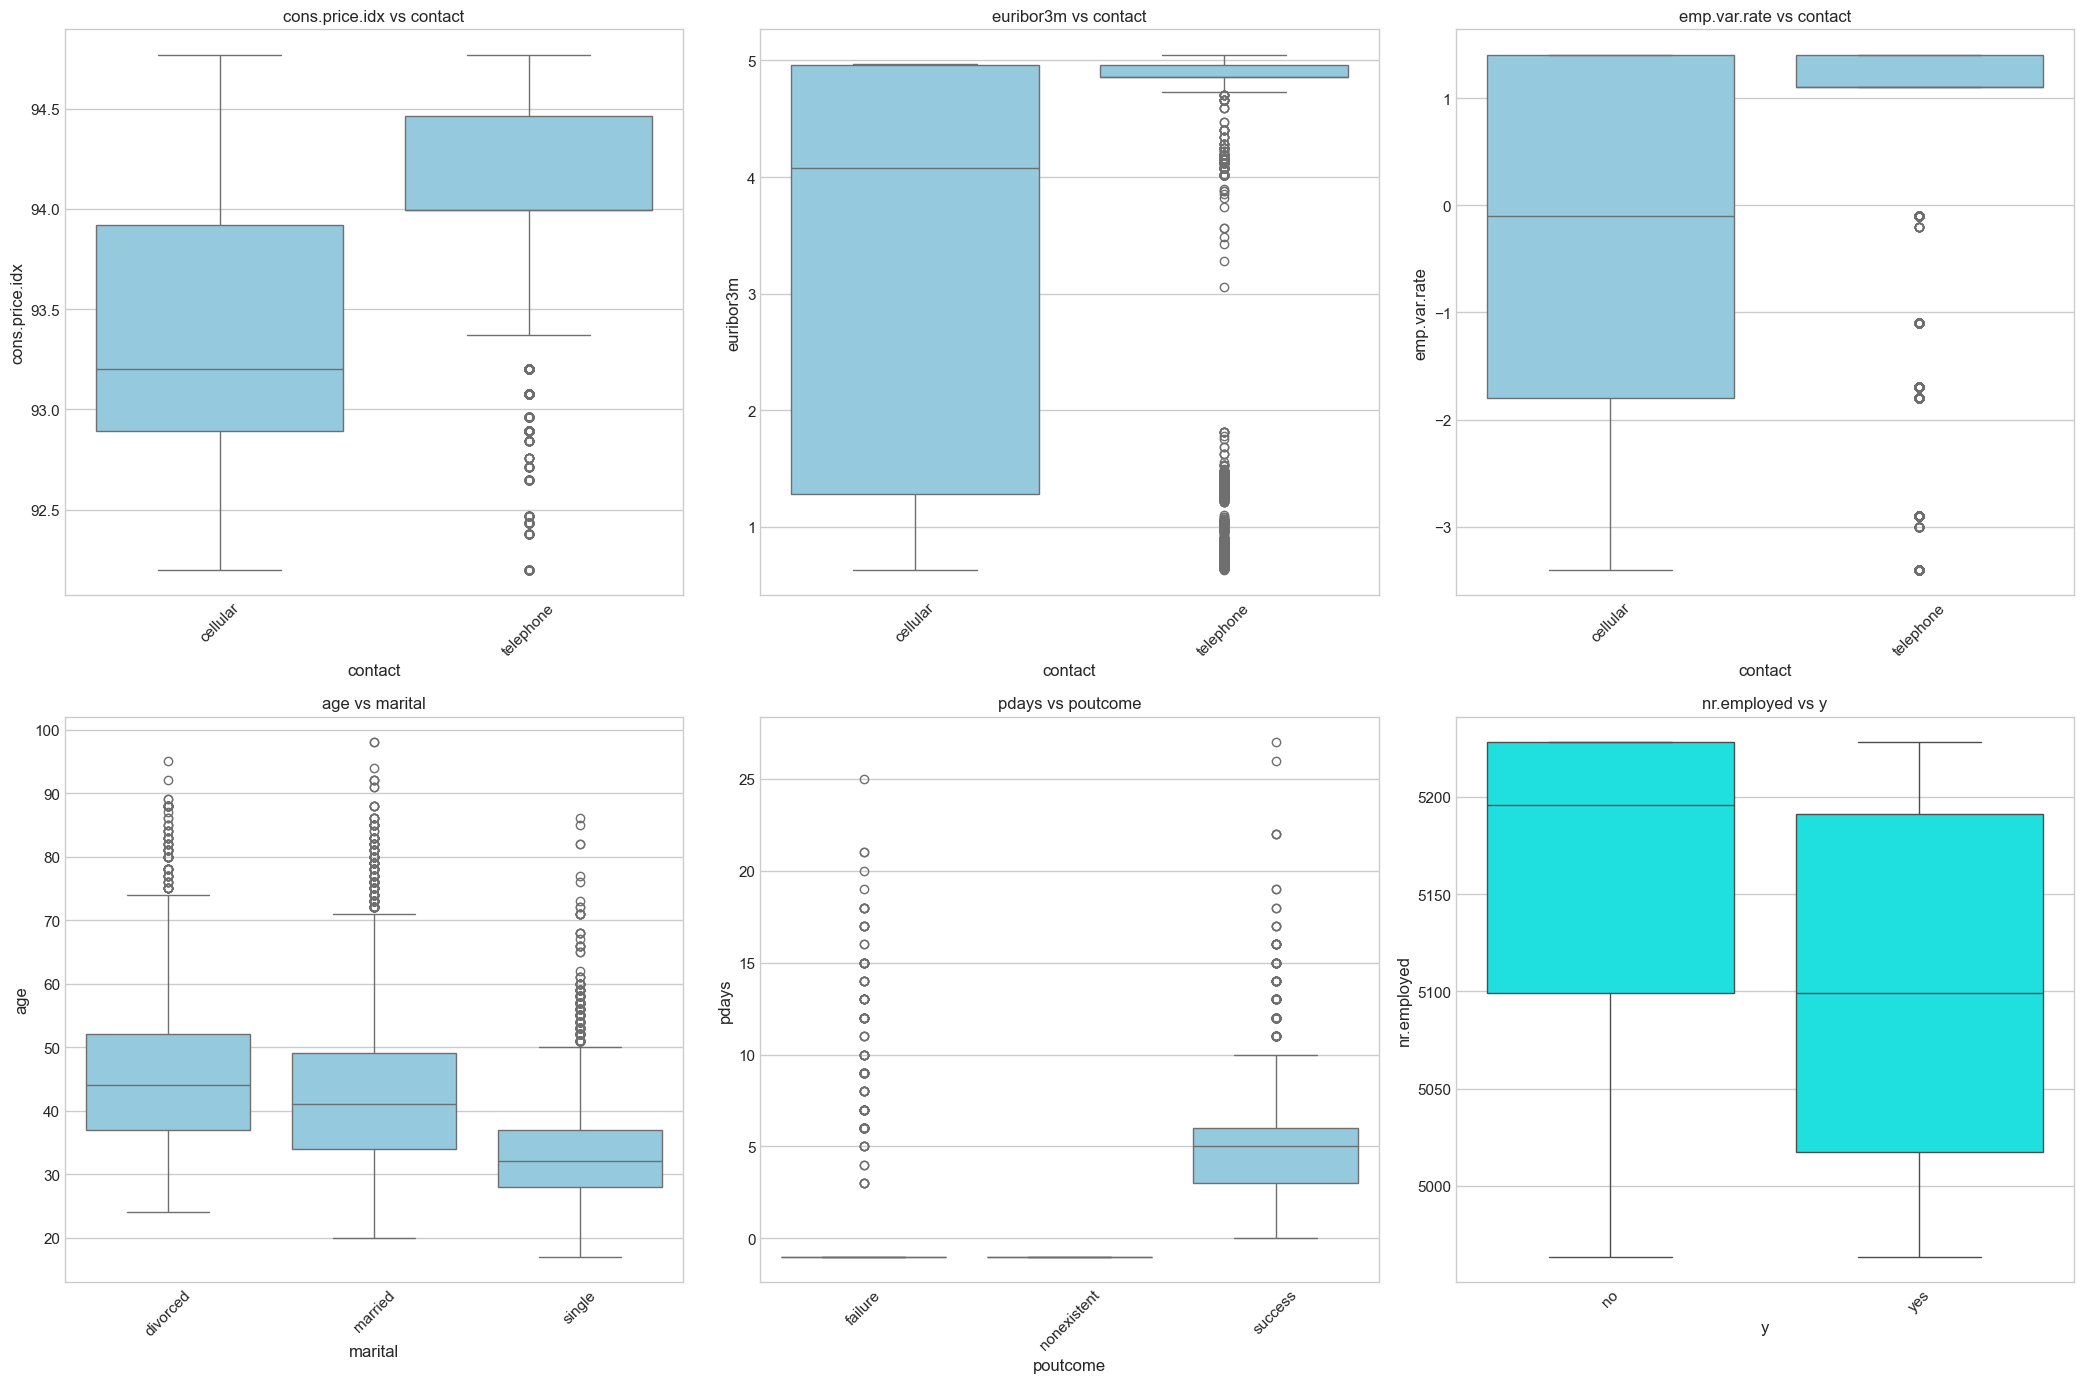

In [114]:
df_plot = point_biserial_corr_df.head(6)
ncols = 3 
nrows = df_plot.shape[0] // ncols + (df_plot.shape[0] % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*7, nrows*7))
axes = axes.flatten()
plot_idx = 0

for idx, row in df_plot.iterrows():
    cat_var, num_var = row['Variable Pair']
    
    sns.boxplot(x=data[cat_var], y=data[num_var], ax=axes[plot_idx], color="aqua" if cat_var == "y" else "skyblue")
    axes[plot_idx].set_title(f'{num_var} vs {cat_var}')
    axes[plot_idx].tick_params(axis='x', rotation=45)
    plot_idx += 1

plt.tight_layout()
plt.show()

In [115]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

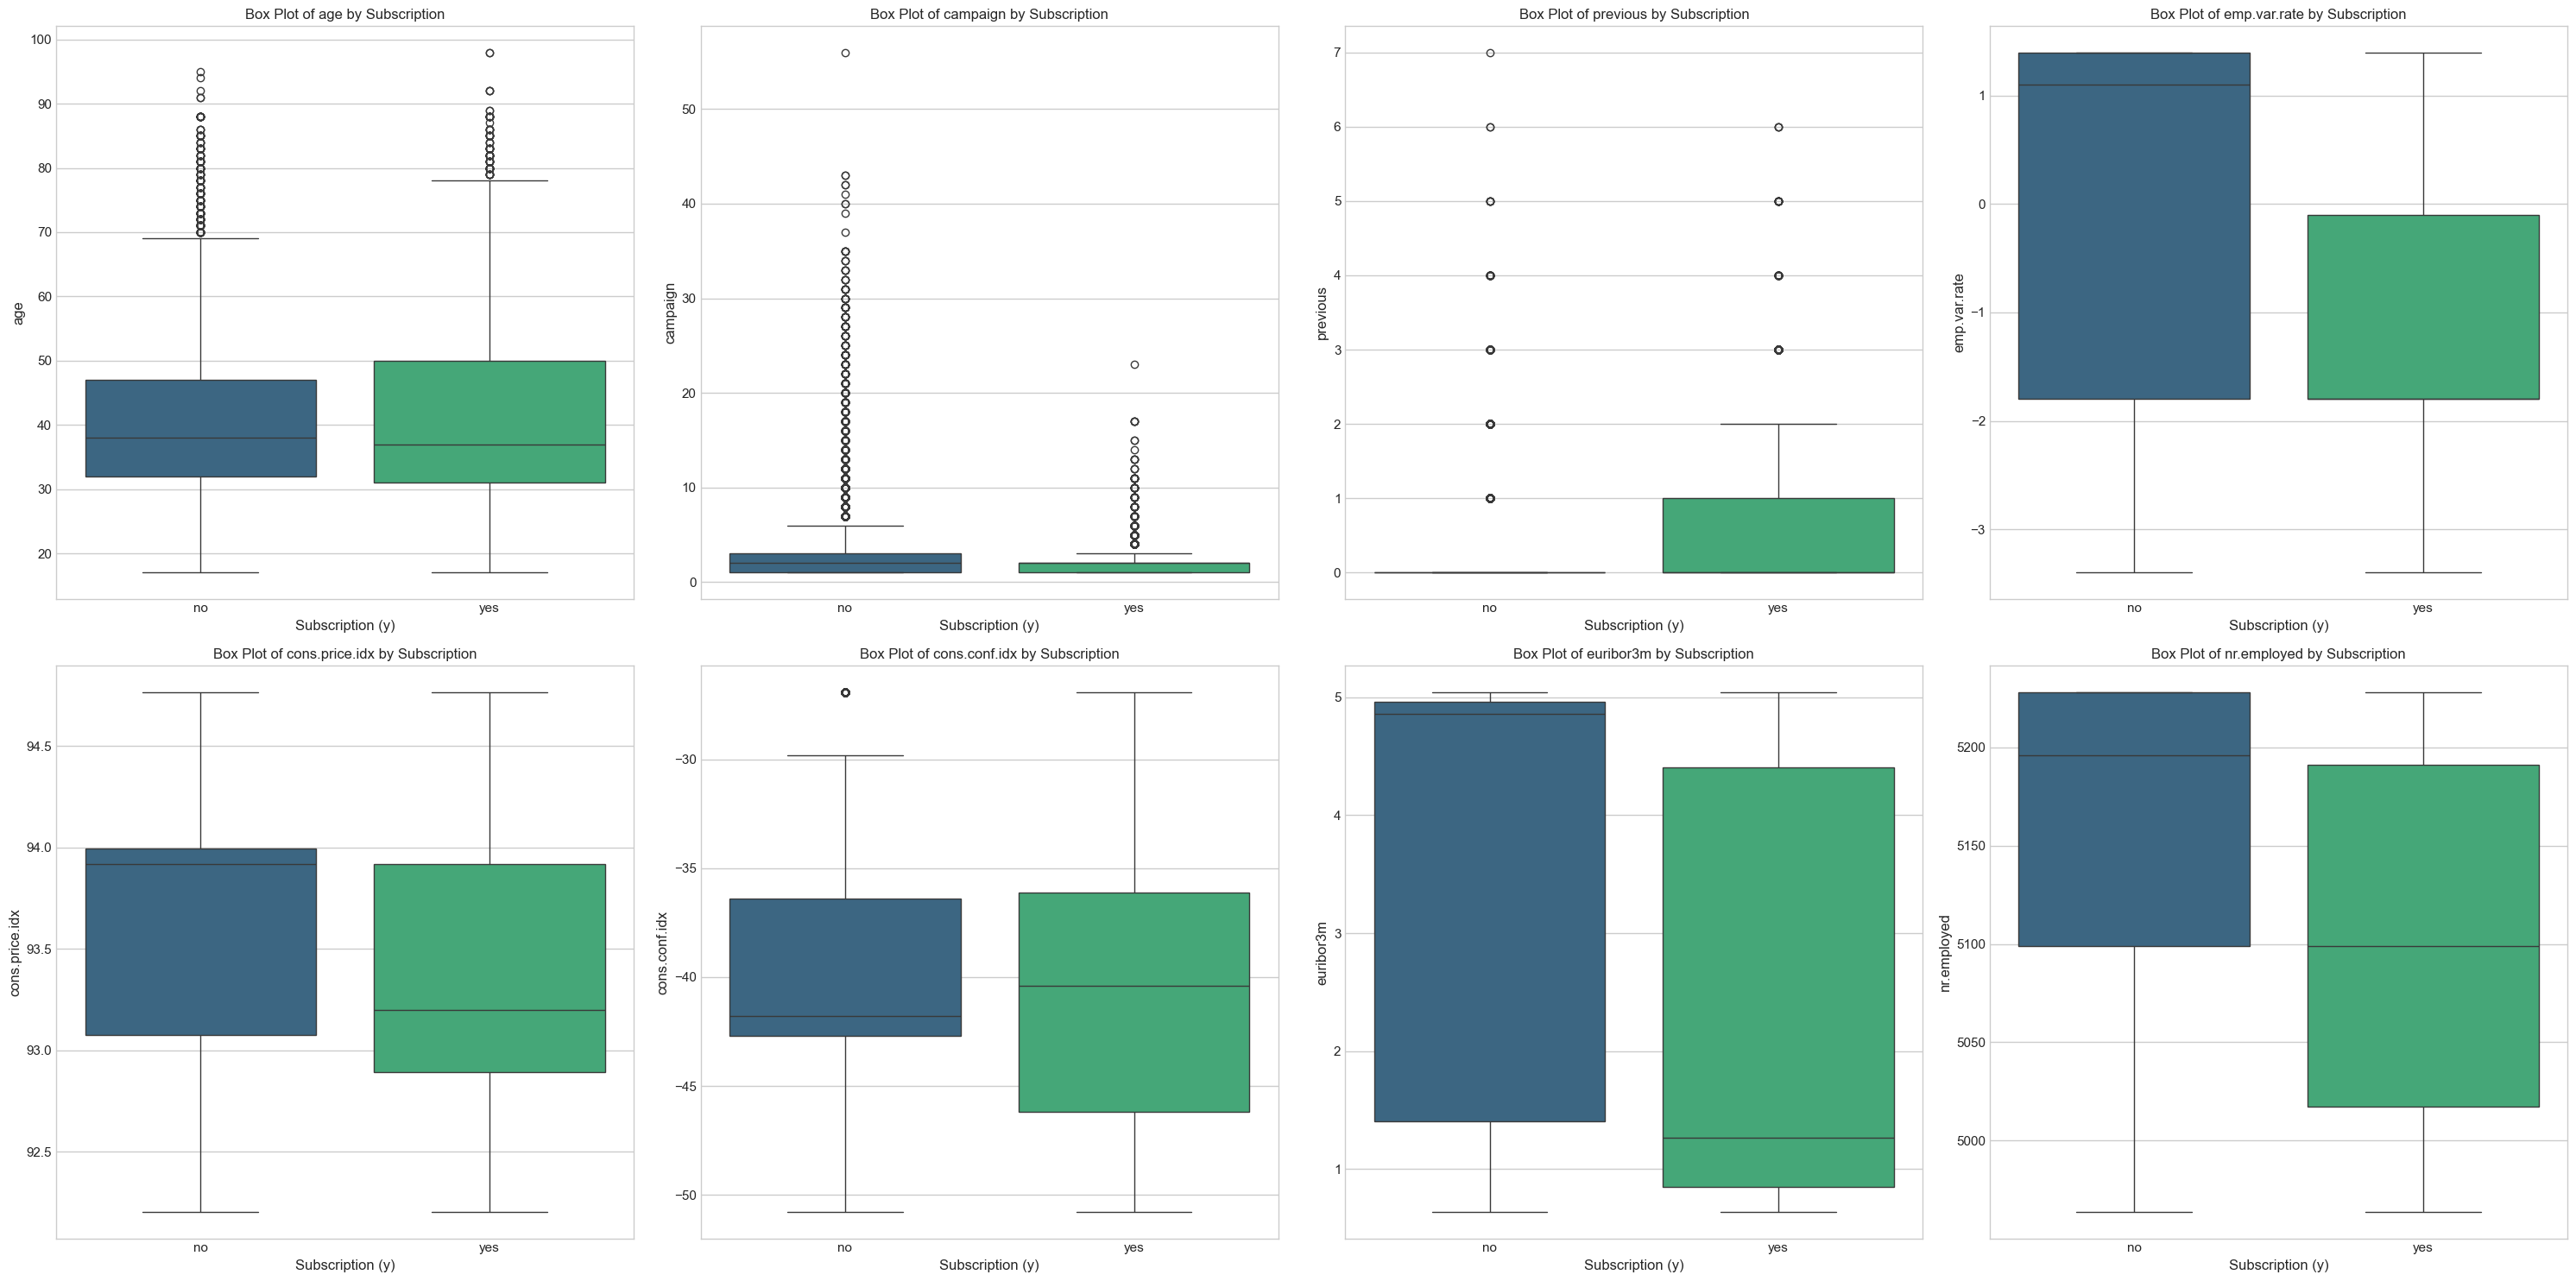

In [116]:
# Boxplots of Numerical Variables by `y`
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axes = axes.flatten()

for idx, var in enumerate(numerical_cols.drop('pdays')):

    sns.boxplot(x=data['y'],
                y=data[var], 
                ax=axes[idx],
                hue=data['y'], 
                palette='viridis')
    
    axes[idx].set_title(f'Box Plot of {var} by Subscription')
    axes[idx].set_xlabel('Subscription (y)')
    axes[idx].set_ylabel(var)

plt.tight_layout()
plt.show()


- Continuous Variables (Boxplots by `y`):

  - **Age**:Subscribers (`y = yes`) have a larger range, indicating that older individuals may have a higher likelihood of subscribing. However, the medians are close, suggesting this effect is minor.

  - **Campaign**:Non-subscribers had more campaign contacts on average. This supports the idea that fewer campaign contacts are more effective for subscription.

  - **Previous**:Subscribers interacted more frequently in the past, emphasizing the importance of previous engagement in driving subscriptions.

  - **Emp. Var. Rate**:Non-subscribers experienced a higher mean employment variation rate, suggesting unfavorable labor market conditions might be linked to subscription likelihood.

  - **Cons. Price Index**:Non-subscribers have a slightly higher mean and median, but the differences are small, making this variable less impactful.

  - **Cons. Conf. Index**:Subscribers have slightly better consumer confidence, with greater variability. Optimism may play a **minor** role in subscription.

  - **Euribor 3m**:Non-subscribers show higher average Euribor rates, indicating lower interest rates might encourage subscriptions.

  - **Nr. Employed**:Non-subscribers have a higher mean number of employees, suggesting a possible correlation between lower employment levels and higher subscriptions.



**Economic Indicators**: Subscribers are associated with worse employment variation rates, lower Euribor rates, and fewer employees, implying that weaker economic conditions might increase subscriptions.

**Customer Interactions**: Past interactions (`previous`) and recent contact (`pdays`) are significant factors in predicting subscriptions.

**Campaign Strategy**: Fewer campaign calls are more effective in converting clients to subscribers.

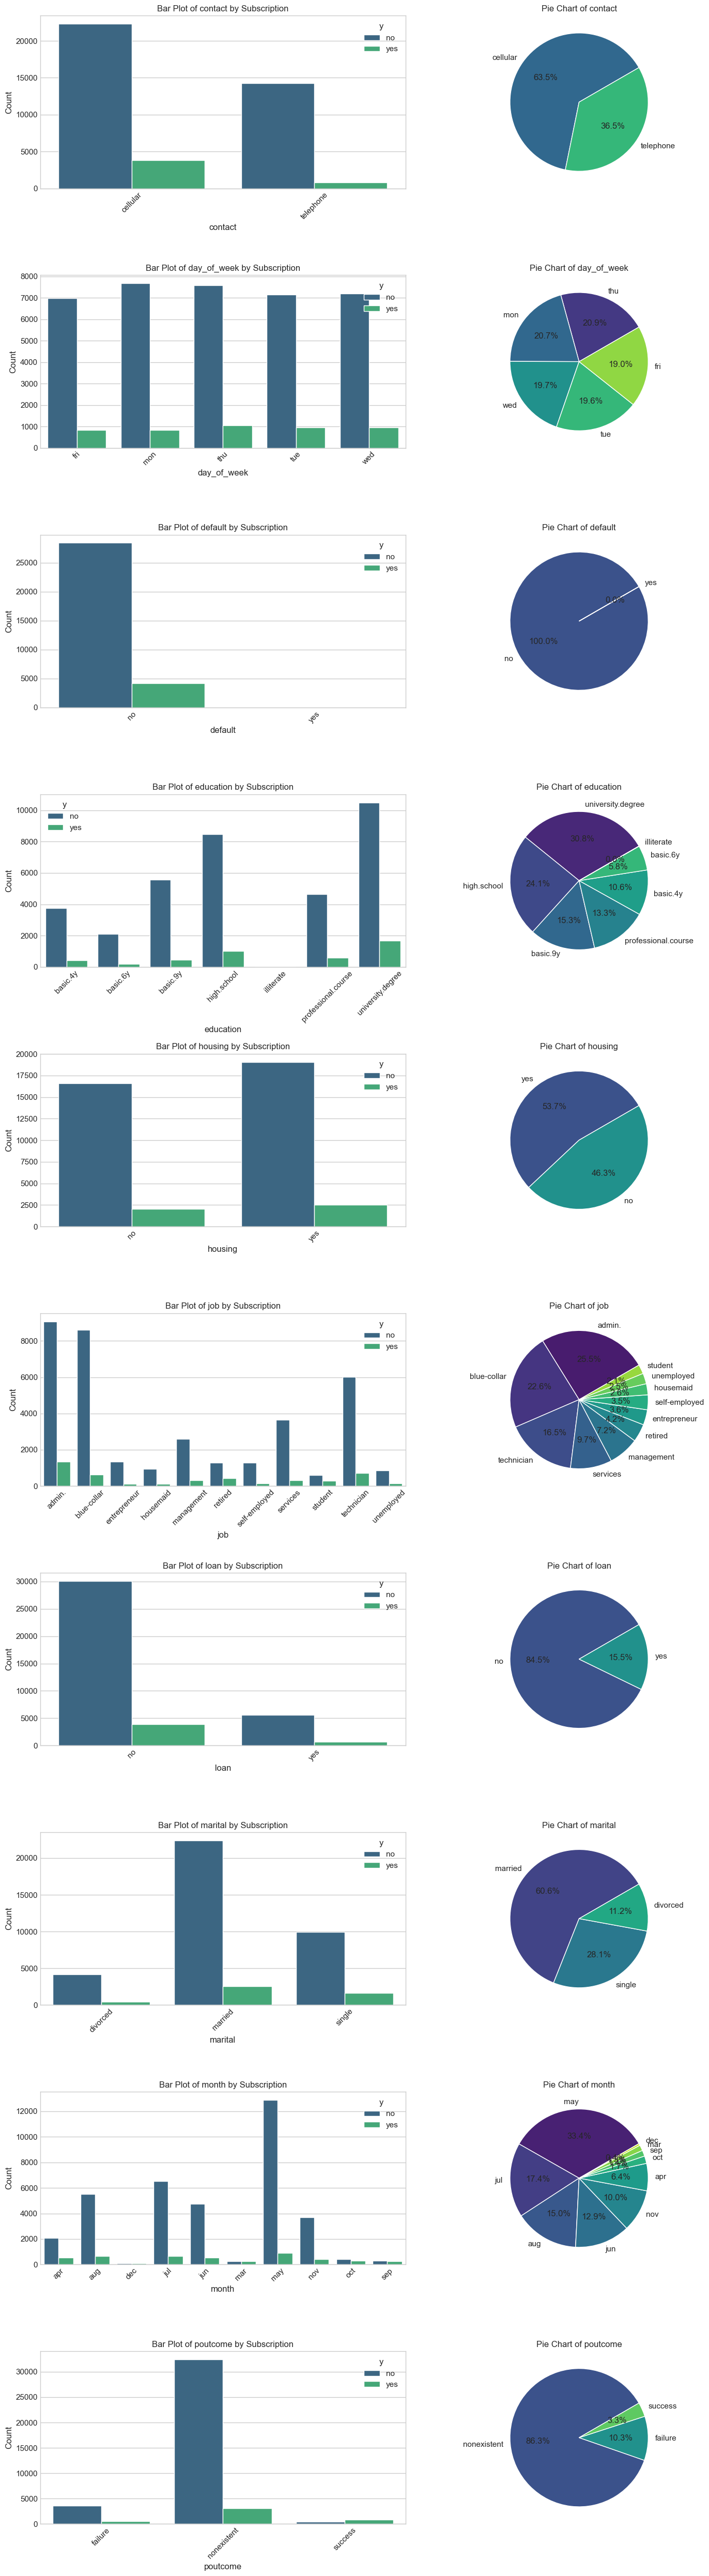

In [117]:
# Categorical Variables (Barplots and Pie Charts by `y`)
fig, axes = plt.subplots(nrows=len(categorical_cols.difference(['y'])), ncols=2, figsize=(15, 5 * len(categorical_cols.difference(['y']))))

for idx, var in enumerate(categorical_cols.difference(['y'])):
    # Bar Plot
    sns.countplot(x=data[var], hue=data['y'], ax=axes[idx, 0], palette='viridis')
    axes[idx, 0].set_title(f'Bar Plot of {var} by Subscription')
    axes[idx, 0].set_xlabel(var)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)

    # Pie Chart
    data[var].value_counts().plot.pie(
        autopct='%1.1f%%', ax=axes[idx, 1], startangle=30, 
        colors=sns.color_palette('viridis', len(data[var].unique())))
    axes[idx, 1].set_title(f'Pie Chart of {var}')
    axes[idx, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


-**Job**: Administrative, blue-collar, and technician roles dominate the subscriber base. Students and retired individuals, though smaller in absolute numbers, show potential for targeted campaigns due to their unique profiles.

-**Marital Status**: Married individuals form the largest group among subscribers, followed by singles. Divorced individuals represent a smaller share, with minimal impact from unknown statuses.

-**Education**: Higher education levels, particularly university degrees, have a strong association with subscriptions. Basic education levels (4y, 6y, and 9y) collectively represent a significant portion, indicating room for outreach in this group.

-**Default**: Subscribers overwhelmingly report no credit default. Unknown values form a large secondary group, while very few individuals with defaults subscribe.

-**Housing Loan**: Subscriptions are evenly split between those with and without housing loans, suggesting this factor may not significantly influence decisions. Unknown statuses remain minimal.

-**Personal Loan**: Most subscribers do not have personal loans, though a significant minority do, indicating some influence of financial flexibility.

-**Contact Type**: Cellular contacts dominate as the preferred method, with a smaller but substantial contribution from telephone contacts.

-**Month**: May and July see the highest subscription activity, with significant contributions from August and June. The lowest activity is in December, likely due to seasonal factors.

-**Day of Week**: Subscriptions are relatively evenly distributed across weekdays, with a slight dip on Fridays.

-**Previous Campaign Outcome**: Nonexistent previous outcomes dominate, followed by failures. Success in prior campaigns is rare but highly indicative of subscription likelihood.


### `pointbiserialr` Corelation

In [118]:
point_biserial_correlation(data)

,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,education,emp.var.rate,euribor3m,housing,job,loan,marital,month,nr.employed,pdays,poutcome,previous,y
age,1,0.0046,0.1294*,0.0009,0.007,-0.0176*,-0.1649*,-0.1633*,-0.0004,0.0108*,-0.001,-0.0131*,-0.006,-0.3887*,-0.0249*,-0.0177*,0.0205*,0.0198*,0.0244*,0.0304*
campaign,0.0046,1,-0.0137*,0.1278*,0.0774*,-0.0383*,-0.0331*,-0.0012,0.1508*,0.1351*,-0.0098*,-0.0078,0.0049,-0.0101*,-0.0621*,0.1441*,-0.044*,0.0326*,-0.0791*,-0.0664*
cons.conf.idx,0.1294*,-0.0137*,1,0.059*,0.2516*,0.0415*,-0.0262*,0.0552*,0.196*,0.2777*,-0.0336*,0.0433*,-0.0151*,-0.0328*,0.0097,0.1005*,0.0687*,0.1783*,-0.0509*,0.0549*
cons.price.idx,0.0009,0.1278*,0.059*,1,0.5915*,0.0056,-0.1683*,-0.1*,0.7753*,0.6882*,-0.0795*,-0.0229*,-0.0116*,-0.055*,-0.0042,0.522*,-0.0471*,0.2113*,-0.2031*,-0.1362*
contact,0.007,0.0774*,0.2516*,0.5915*,1,-0.0096,-0.1357*,-0.1163*,0.3936*,0.3998*,-0.0835*,-0.0324*,-0.0205*,-0.0536*,0.2766*,0.2692*,-0.1024*,0.1187*,-0.2128*,-0.1448*
day_of_week,-0.0176*,-0.0383*,0.0415*,0.0056,-0.0096,1,0.0091,-0.005,0.0332*,0.039*,0.0029,-0.0044,-0.0086,0.0027,0.0277*,0.0284*,0.0054,0.0187*,-0.0041,0.016*
default,-0.1649*,-0.0331*,-0.0262*,-0.1683*,-0.1357*,0.0091,1,0.2197*,-0.2031*,-0.1951*,0.0174*,0.0462*,0.0078,0.0768*,0.0156*,-0.1895*,0.0704*,-0.0238*,0.1026*,0.0992*
education,-0.1633*,-0.0012,0.0552*,-0.1*,-0.1163*,-0.005,0.2197*,1,-0.0398*,-0.0305*,0.023*,0.1244*,0.0146*,0.1028*,-0.0766*,-0.0242*,0.0184*,0.0113*,0.0209*,0.04*
emp.var.rate,-0.0004,0.1508*,0.196*,0.7753*,0.3936*,0.0332*,-0.2031*,-0.0398*,1,0.9722*,-0.0556*,-0.0131*,-0.0001,-0.0815*,-0.1788*,0.907*,-0.2293*,0.193*,-0.4205*,-0.2983*
euribor3m,0.0108*,0.1351*,0.2777*,0.6882*,0.3998*,0.039*,-0.1951*,-0.0305*,0.9722*,1,-0.0547*,-0.0131*,-0.0015,-0.0894*,-0.1173*,0.9452*,-0.2619*,0.1841*,-0.4545*,-0.3078*


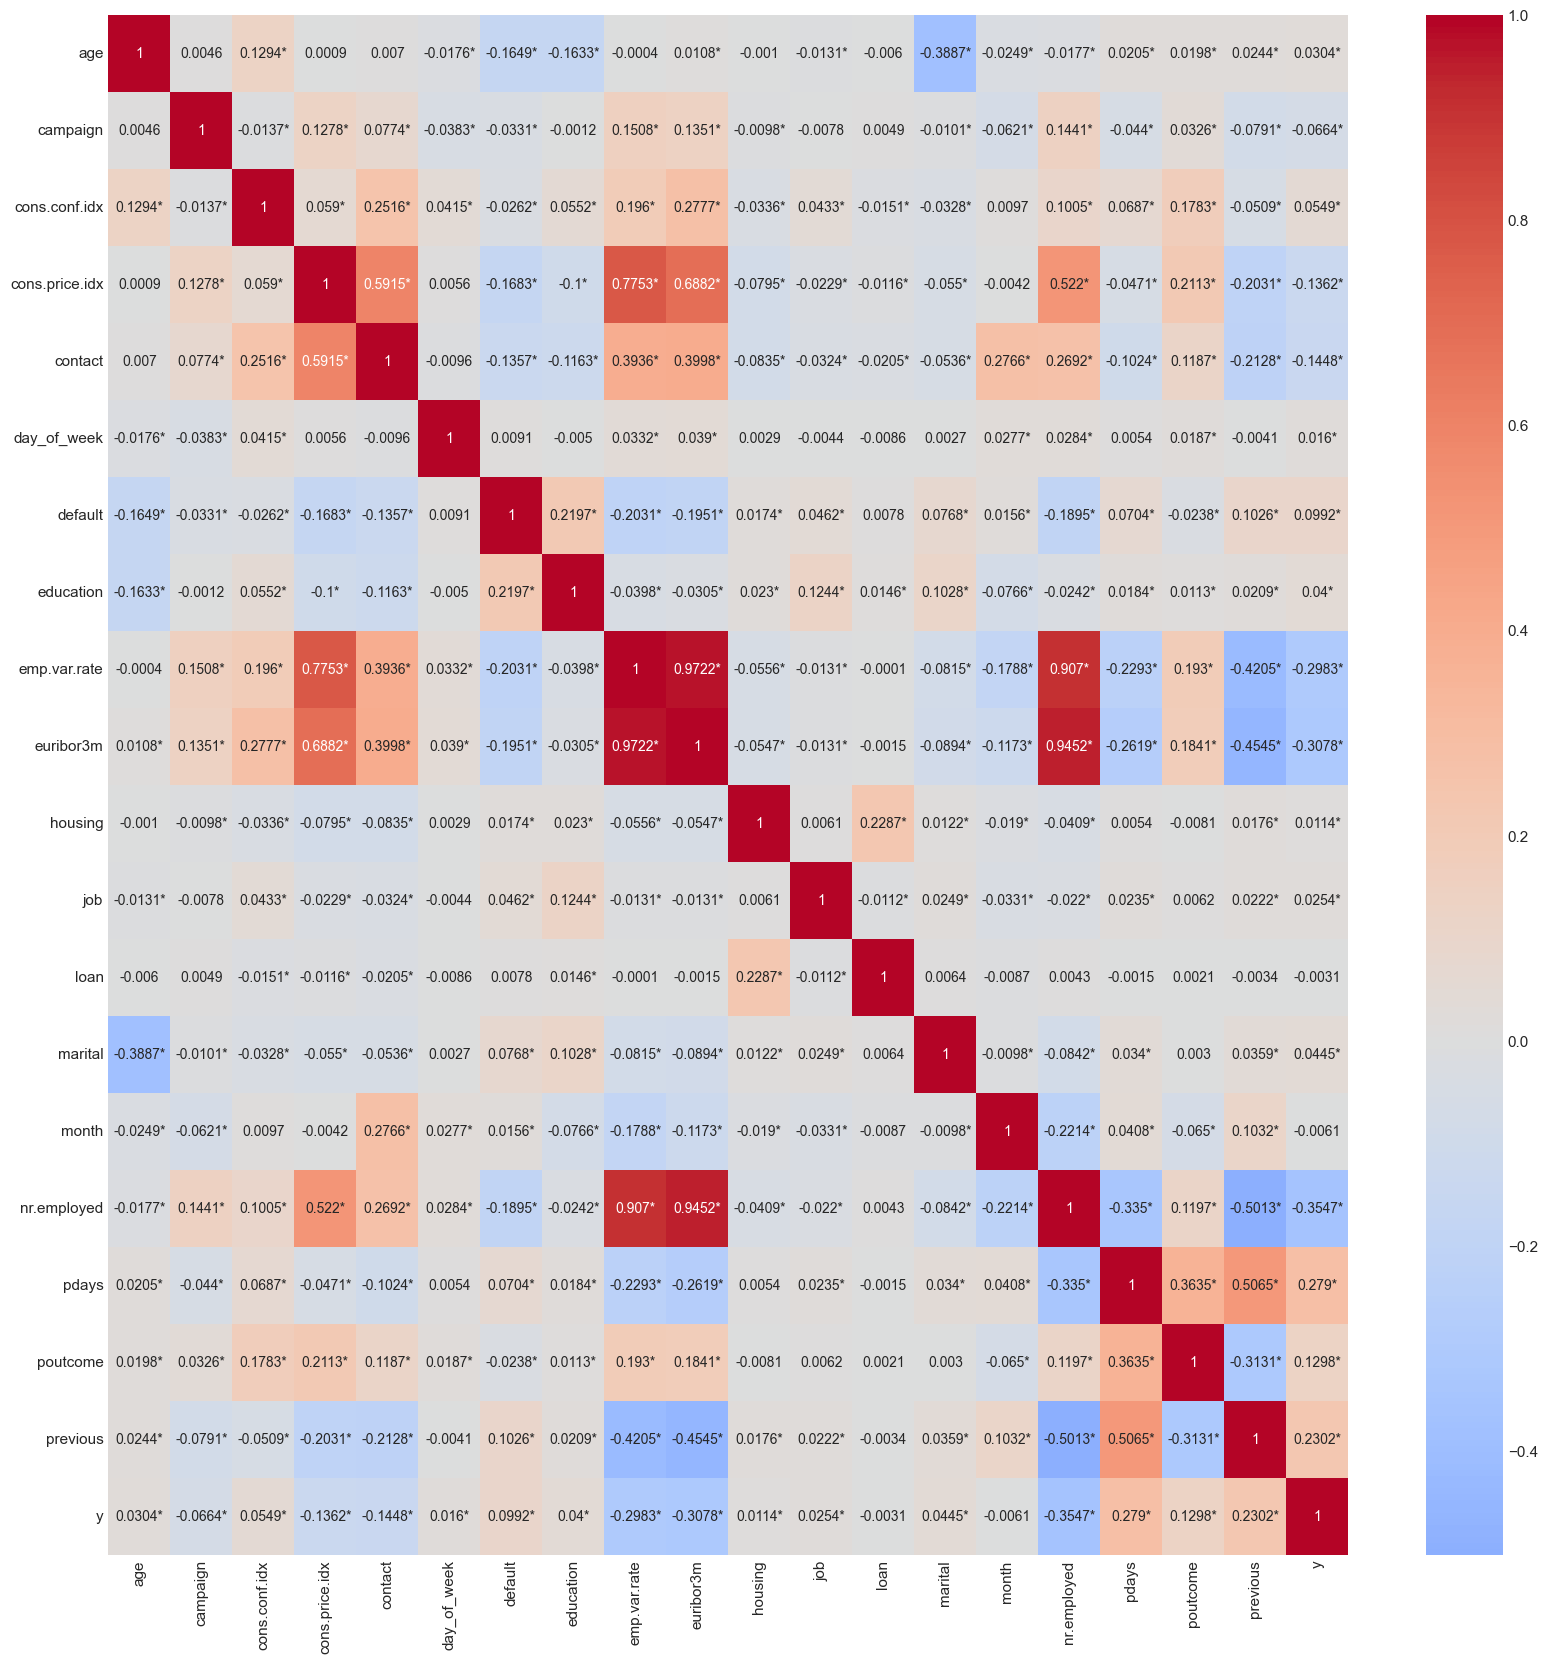

In [119]:
point_biserial_correlation(data,plot=True)


- Strong Correlations (|r| > 0.7):
  1. **Economic Variables:**
     - `emp.var.rate` and `euribor3m`: **0.9722**  
       These variables are highly correlated, as both reflect economic conditions.
     - `emp.var.rate` and `nr.employed`: **0.9070**  
       This strong correlation indicates that as employment rates improve, the number of employed individuals increases.
     - `euribor3m` and `nr.employed`: **0.9452**  
       Suggests that interest rate trends align closely with employment levels.

  2. **Marketing and Economic Indicators:**
     - `cons.price.idx` and `emp.var.rate`: **0.7753**  
       Indicates that the consumer price index aligns with employment variation.

- Moderate Correlations (0.3 ≤ |r| ≤ 0.7):
  1. **Campaign Variables:**
     - `pdays` and `previous`: **0.5065**  
       A moderate positive correlation, showing that more recent contacts in previous campaigns correlate with higher previous contact numbers.

  2. **Marketing and Economic Indicators:**
     - `contact` and `euribor3m`: **0.3998**  
       Cellular contact correlates moderately with the Euribor rate.
     - `contact` and `cons.price.idx`: **0.5915**  
       Suggests marketing contact strategies are influenced by the price index.

  3. **Outcome (`y`) Correlations:**
     - `pdays` and `y`: **0.2790**  
       Shows that shorter intervals since previous contacts may slightly impact the likelihood of subscription.
     - `previous` and `y`: **0.2302**  
       Indicates a positive but modest association between past contact frequency and campaign success.
     - `poutcome` and `y`: **0.1298**  
       Past campaign success moderately aligns with current campaign outcomes.

- Weak or Negligible Correlations:
  1. **Demographics:**
     - `age` has minimal correlations with most variables (highest: `default` at **0.1650**).
     - `education` weakly correlates with other variables (`y`: **0.0578**).
     
  2. **Housing and Loan Variables:**
     - `housing` and `loan` show minimal correlation with the target (`y`).

  3. **Campaign Variables:**
     - `campaign` and `y`: **-0.0664**  
       Weak negative correlation indicates more contacts may not necessarily improve success rates.


# Feature Engineering

In [120]:
from sklearn.preprocessing import StandardScaler
Cols_to_drop=[]


### Transformation de la variable `pdays`


In [121]:
data['prev_contact'] = pd.cut(data['pdays'], 
                    bins=[-1,0, 8 , 16 , 28],
                    right=False ,
                    labels=['Never','[0-7]', '[7-15]', '15<'])
Cols_to_drop.append('pdays')

In [122]:
data['prev_contact'].cat.codes.value_counts()

0    39673
1     1177
2      300
3       38
Name: count, dtype: int64


### Transformation de la variable `age`


In [123]:
# trasform age to a categrory variable
data['age_cat'] = pd.cut(data['age'], 
                       bins=[0, 23-0.01, 30-0.01, 40-0.01, 60-0.01, 100], 
                       labels=['[0-23[', '[23-30[', '[30-40[', '[40-60[', '60<'])
Cols_to_drop.append('age')

### Création des variables `campaign_efficiency`

Nous avons créé deux nouvelles variables pour enrichir notre analyse :

1. **campaign_efficiency** : Cette variable mesure l'efficacité de la campagne en calculant le ratio entre le nombre de contacts précédents réussis et le nombre total de contacts de la campagne.
   


In [124]:
data['campaign_efficiency'] = data.apply(lambda row: row['previous'] / row['campaign'] if row['poutcome'] == 'success' else 0, axis=1)

In [125]:

correlation, p_value = pointbiserialr(data['campaign_efficiency'], data['poutcome'].cat.codes)
print(f"poutcome corr = {correlation}, P-value: {p_value}")
correlation, p_value = pointbiserialr(data['campaign_efficiency'], data['previous'])
print(f"previous corr = {correlation}, P-value: {p_value}")
correlation, p_value = pointbiserialr(data['campaign_efficiency'], data['campaign'])
print(f"campaign corr = {correlation}, P-value: {p_value}")

poutcome corr = 0.4323652219813514, P-value: 0.0
previous corr = 0.5726604012501781, P-value: 0.0
campaign corr = -0.06288907264775719, P-value: 2.2473488081450727e-37


In [126]:
Cols_to_drop.extend(['previous', 'poutcome'])

### Traitment des variables economiques

In [127]:
# TODO: Keep or drop this variable
#
# economic_factors = data[['cons.price.idx', 'cons.conf.idx', 'emp.var.rate','euribor3m', 'nr.employed']]
# weights = [0.6, -1.0, 0.6, 0.5, 0.3] # Weights for the economic factors obtained from the maximum correlation with y on [-1,1]
# data['economic_sentiment_weighted'] = (economic_factors * weights).sum(axis=1)
# point_biserial_correlation(data[['cons.price.idx', 'cons.conf.idx', 'emp.var.rate', 'euribor3m', 'nr.employed','economic_sentiment_weighted','y']])
# Cols_to_drop.extend(['cons.price.idx', 'cons.conf.idx', 'emp.var.rate', 'euribor3m', 'nr.employed'])
# sns.boxplot(x=data['y'], y=data['economic_sentiment_weighted'])
# plt.title('Box Plot of Economic Sentiment Weighted by Subscription')
# plt.xlabel('Subscription (y)')
# plt.ylabel('Economic Sentiment Weighted')
# plt.show()

In [128]:
economic_factors = data[['cons.price.idx', 'cons.conf.idx', 'emp.var.rate','euribor3m', 'nr.employed']]
point_biserial_correlation(economic_factors.join(data['y']))

,cons.conf.idx,cons.price.idx,emp.var.rate,euribor3m,nr.employed,y
cons.conf.idx,1,0.059*,0.196*,0.2777*,0.1005*,0.0549*
cons.price.idx,0.059*,1,0.7753*,0.6882*,0.522*,-0.1362*
emp.var.rate,0.196*,0.7753*,1,0.9722*,0.907*,-0.2983*
euribor3m,0.2777*,0.6882*,0.9722*,1,0.9452*,-0.3078*
nr.employed,0.1005*,0.522*,0.907*,0.9452*,1,-0.3547*
y,0.0549*,-0.1362*,-0.2983*,-0.3078*,-0.3547*,1


In [129]:
from sklearn.decomposition import PCA


scaler = StandardScaler()
economic_factors_scaled = scaler.fit_transform(economic_factors)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(economic_factors_scaled)


In [130]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.69421113 0.19655831]
[0.69421113 0.89076944]


In [131]:
principal_components = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
point_biserial_correlation(principal_components.join(economic_factors))

,PC1,PC2,cons.conf.idx,cons.price.idx,emp.var.rate,euribor3m,nr.employed
PC1,1,-0.0,-0.2455*,-0.785*,-0.9904*,-0.9865*,-0.9167*
PC2,-0.0,1,0.9656*,-0.1901*,-0.0469*,0.0491*,-0.0979*
cons.conf.idx,-0.2455*,0.9656*,1,0.059*,0.196*,0.2777*,0.1005*
cons.price.idx,-0.785*,-0.1901*,0.059*,1,0.7753*,0.6882*,0.522*
emp.var.rate,-0.9904*,-0.0469*,0.196*,0.7753*,1,0.9722*,0.907*
euribor3m,-0.9865*,0.0491*,0.2777*,0.6882*,0.9722*,1,0.9452*
nr.employed,-0.9167*,-0.0979*,0.1005*,0.522*,0.907*,0.9452*,1


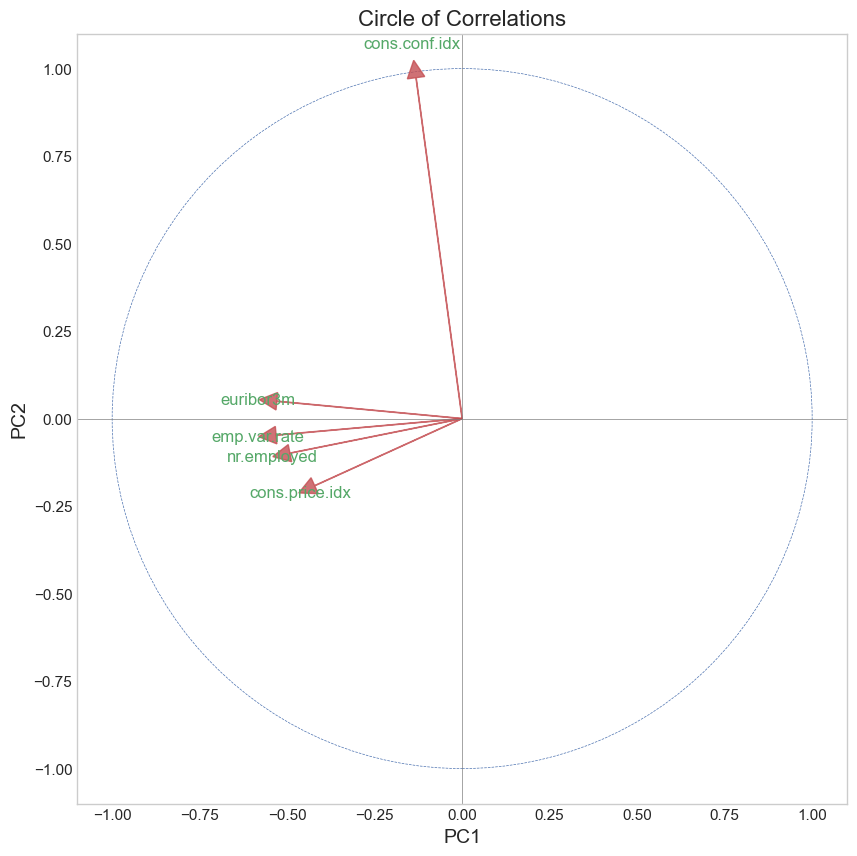

In [132]:
pcs = pca.components_
plt.figure(figsize=(10, 10))

circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=0.5)
plt.gca().add_artist(circle)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.8, head_width=0.05, head_length=0.05)
    plt.text(x * 1.1, y * 1.1, economic_factors.columns.tolist()[i], color='g', ha='center', va='center', fontsize=12)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("Circle of Correlations", fontsize=16)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

- **Interpreting the Factors**
   1. **Factor 1 (PC1)**:
      - Represents **macroeconomic stability or growth**:
        - High values in PC1 might indicate periods of economic contraction (e.g., low employment, falling interest rates).
        - Low values in PC1 might indicate a stable or growing economy.

   2. **Factor 2 (PC2)**:
      - Represents **consumer sentiment**:
        - High PC2 values are linked to optimistic consumer confidence.
        - Low PC2 values might reflect consumer pessimism or uncertainty.

Therefore, we can drop the secondary components to simplify the model and focus on the primary factors driving economic conditions, droping the representative variables with the first component.

In [133]:
data['econStabSentPCA']=principal_components["PC1"]
Cols_to_drop.extend(economic_factors.columns.drop('cons.conf.idx').tolist())

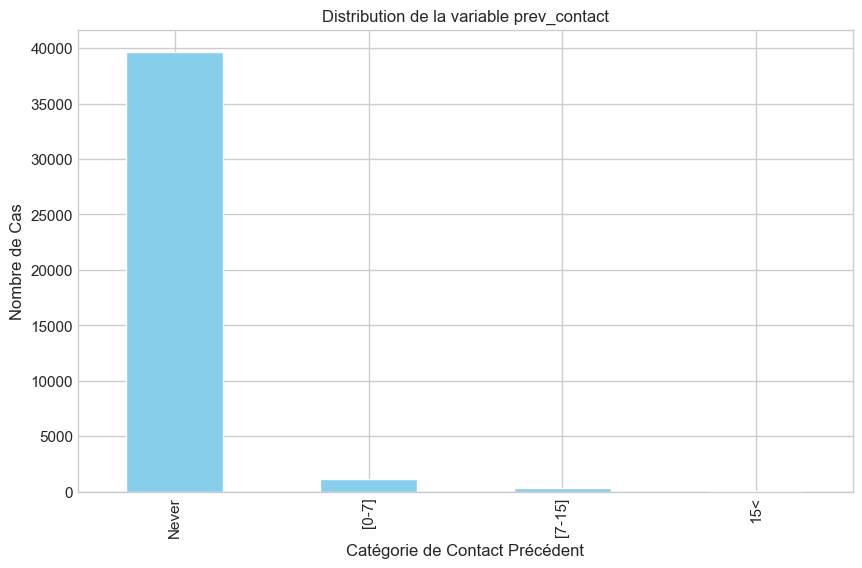

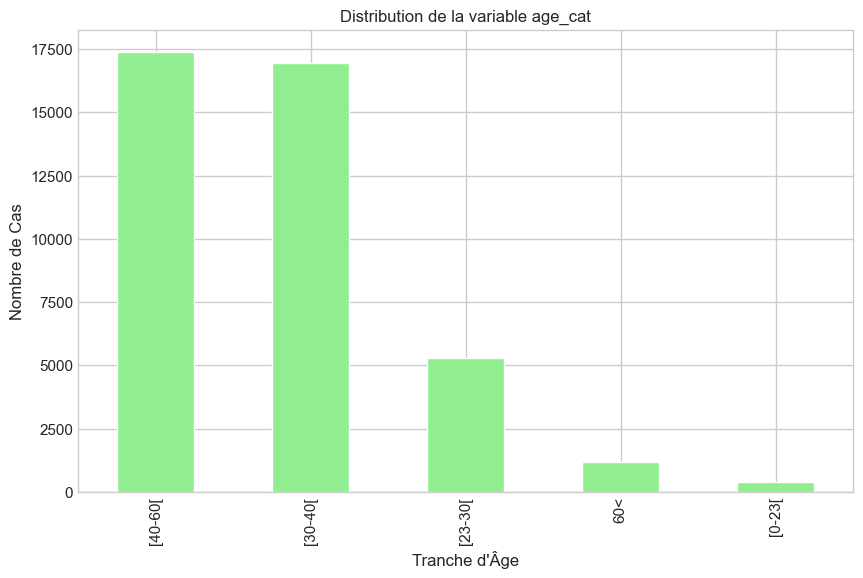

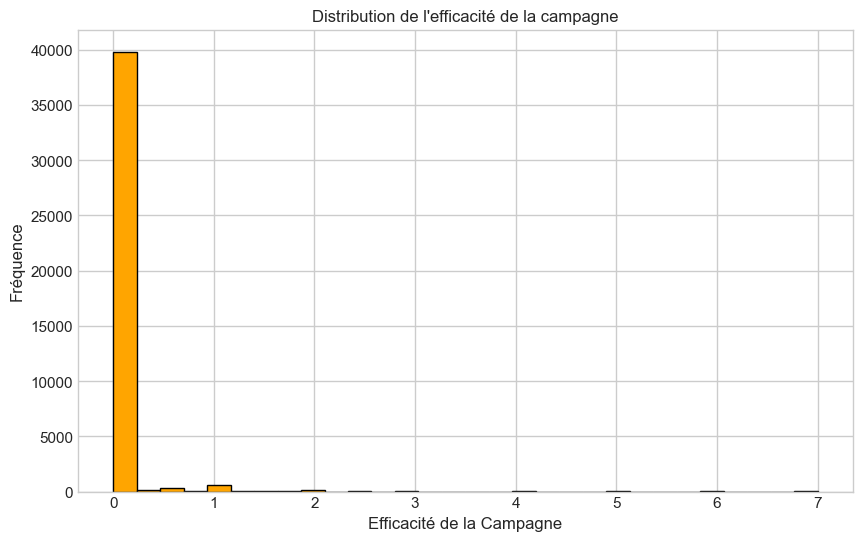

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is the DataFrame with your data
# Creating the new features

# 1. Create 'prev_contact' based on 'pdays'
data['prev_contact'] = pd.cut(data['pdays'], 
                            bins=[-1, 0, 8, 16, 28], 
                            right=False, 
                            labels=['Never', '[0-7]', '[7-15]', '15<'])

# 2. Create 'age_cat' based on 'age'
data['age_cat'] = pd.cut(data['age'], 
                      bins=[0, 23-0.01, 30-0.01, 40-0.01, 60-0.01, 100], 
                      labels=['[0-23[', '[23-30[', '[30-40[', '[40-60[', '60<'])

# 3. Create 'campaign_efficiency' based on 'previous' and 'campaign'
data['campaign_efficiency'] = data.apply(lambda row: row['previous'] / row['campaign'] if row['poutcome'] == 'success' else 0, axis=1)

# Plot the distribution of 'prev_contact'
plt.figure(figsize=(10, 6))
data['prev_contact'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution de la variable prev_contact')
plt.xlabel('Catégorie de Contact Précédent')
plt.ylabel('Nombre de Cas')
plt.savefig('prev_contact_dist.png')

# Plot the distribution of 'age_cat'
plt.figure(figsize=(10, 6))
data['age_cat'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution de la variable age_cat')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Nombre de Cas')
plt.savefig('age_cat_dist.png')

# Plot the distribution of 'campaign_efficiency'
plt.figure(figsize=(10, 6))
data['campaign_efficiency'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Distribution de l\'efficacité de la campagne')
plt.xlabel('Efficacité de la Campagne')
plt.ylabel('Fréquence')
plt.savefig('campaign_efficiency_dist.png')
